## 🚗 Machine Learning- Modelado Proyección de Precios de Autos 🚗

## Importando librerías

In [1]:
# eliminar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# modulo para entrenar y testear
from sklearn.model_selection import train_test_split
# modulo para escalamiento o normalizacion
from sklearn.preprocessing import MinMaxScaler
# modulo para analisis estadistico
import statsmodels.api as sm
# VIF detector de colinealidad
from statsmodels.stats.outliers_influence import variance_inflation_factor
# RFE eliminar recursividad y regresion lineal
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# modulo para la validacion cruzada
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

## Extrayendo el Dataset

In [4]:
#llamar el dataset a analizar CSV
cars = pd.read_csv("ML_cars.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.shape

(205, 26)

In [6]:
#medidas estadisticas descriptivas
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Transformando y limpiando el Dataset 

In [8]:
#busqueda de datos nulos 
cars.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# busqueda de datos duplicados
df_duplicated_cars= cars.loc[cars['car_ID'].duplicated(keep=False)]
print("registros duplicados en cars(car_ID): ")

registros duplicados en cars(car_ID): 


In [10]:
#modificamos las marcas mal escritas a traves de un diccionario
cars[['Marca', 'Modelo']] = cars['CarName'].str.split(' ', n=1, expand=True)
errados = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
correctos = ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(errados, correctos))

# Realizar el reemplazo basado en el diccionario
cars['Marca'] = cars['Marca'].replace(dicMarca)


In [11]:
#transformar a numeros los datos con letras columnas cylindernumber y doornumber
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [12]:
cars.doornumber.unique()

array(['two', 'four'], dtype=object)

In [13]:
#reemplazo de numero de cilindros
cars.cylindernumber = cars.cylindernumber.str.lower()

def replace_name(a,b):
    cars.cylindernumber.replace(a,b,inplace=True)

replace_name('four','4')
replace_name('five','5')
replace_name('six','6')
replace_name('three','3')
replace_name('twelve','12')
replace_name("two", "2")
replace_name("eight","8")

cars.cylindernumber.unique().astype(int)

array([ 4,  6,  5,  3, 12,  2,  8])

In [14]:
#reemplazo de numero de puertas
cars.doornumber = cars.doornumber.str.lower()

def replace_name(a,b):
    cars.doornumber.replace(a,b,inplace=True)

replace_name("two", "2")
replace_name("four","4")

cars.doornumber.unique().astype(int)

array([2, 4])

## Analisis Exploratorio de Datos - Visualizacion

### Una visualizacion en general de los datos de precio

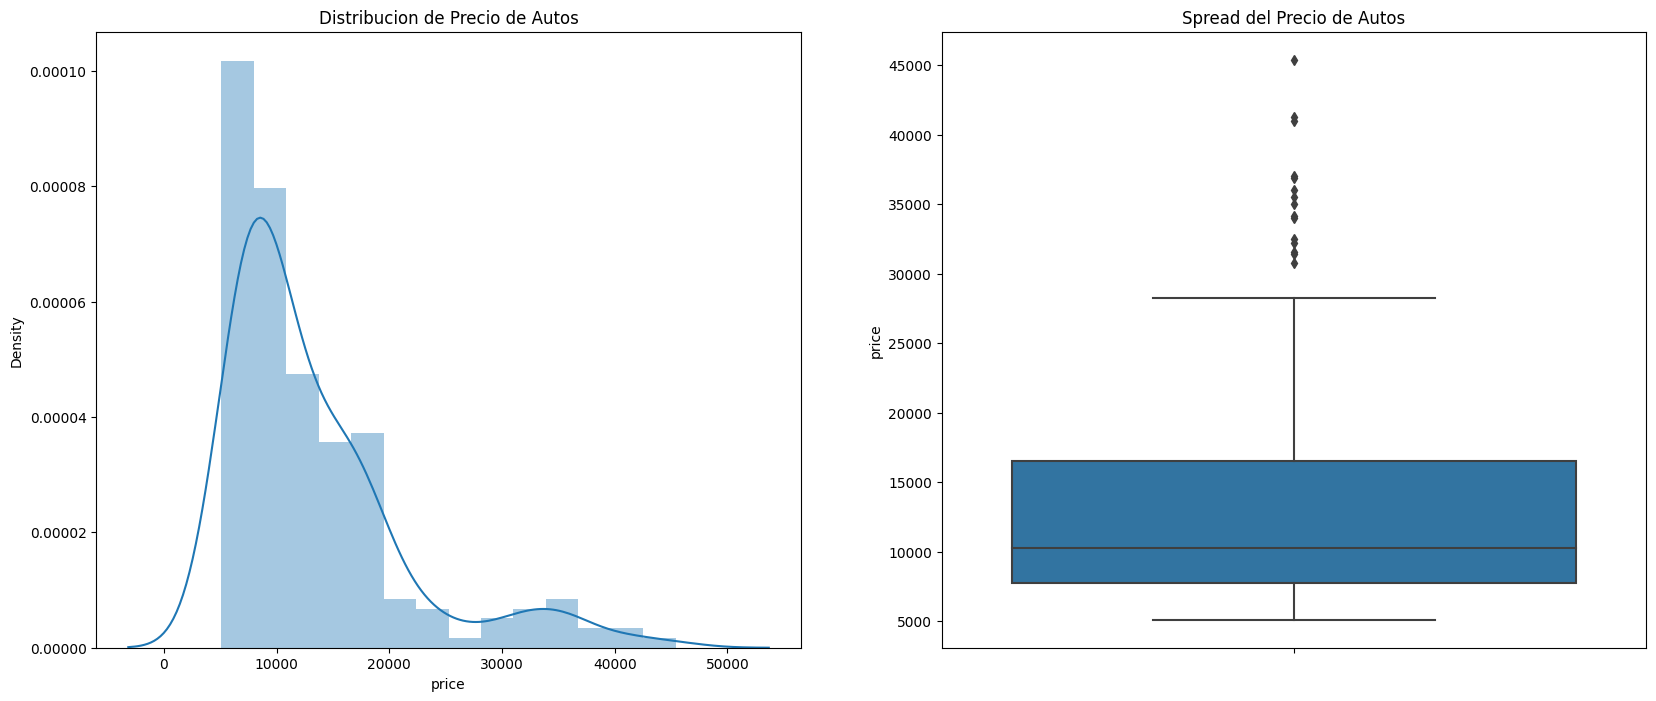

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribucion de Precio de Autos')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Spread del Precio de Autos')
sns.boxplot(y=cars.price)

plt.show()

### Algunas conclusiones son las siguientes:

-El gráfico parece estar sesgado hacia la derecha, lo que significa que la mayoría de los precios en el conjunto de datos están en el rango más bajo (por debajo de 15000).

-Existe una diferencia significativa entre el valor medio y la mediana de la distribución de precios.

-Los datos tienen valores atípicos que están muy lejos de la media, lo que indica una alta variabilidad en los precios de los automóviles. (El 85% de los precios están por debajo de 18.500, mientras que el 15% restante se encuentra en el rango de 18.500 a     45.400).

## Visualizacion de Variables Categoricas

- CarName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

In [38]:
#creación de variable categórica para luego transformar en dummies
variables_categoricas = ["Marca", "fueltype",'aspiration','carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']

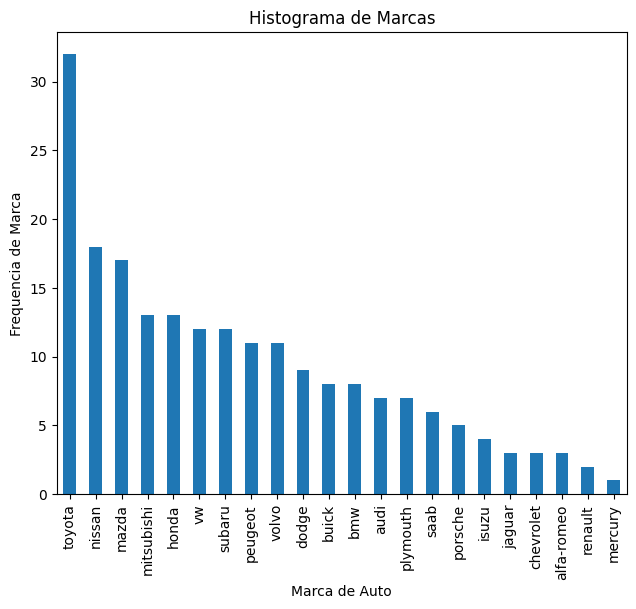

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.Marca.value_counts().plot(kind='bar')
plt.title('Histograma de Marcas')
plt1.set(xlabel = 'Marca de Auto', ylabel='Frequencia de Marca')
plt.show()

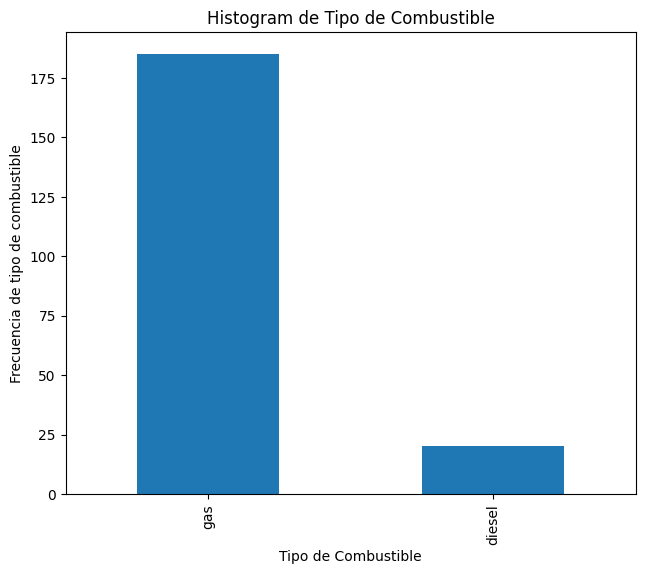

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Histogram de Tipo de Combustible')
plt1.set(xlabel = 'Tipo de Combustible', ylabel='Frecuencia de tipo de combustible')
plt.show()

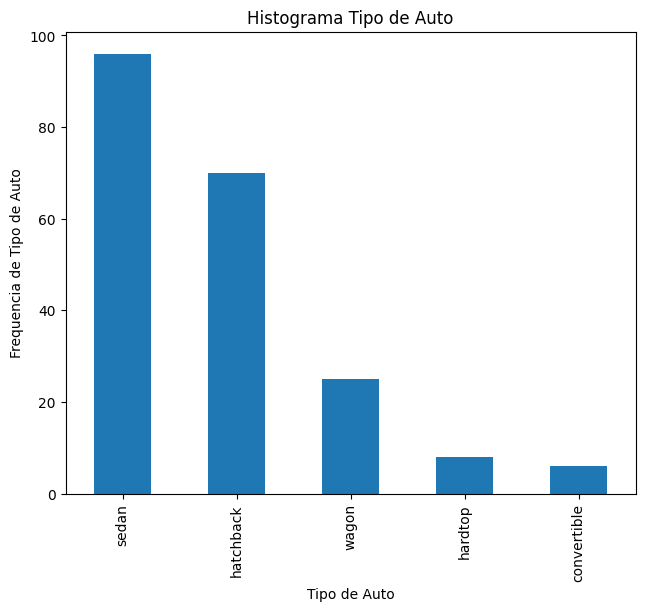

In [19]:
plt.figure(figsize=(25, 6))
plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Histograma Tipo de Auto')
plt1.set(xlabel = 'Tipo de Auto', ylabel='Frequencia de Tipo de Auto')
plt.show()

### Conclusión:
-Toyota es la marca de automóviles más preferida por los consumidores.

-Hay más automóviles que funcionan con nafta que con motores diésel.

-El sedán es el tipo de automóvil más preferido.

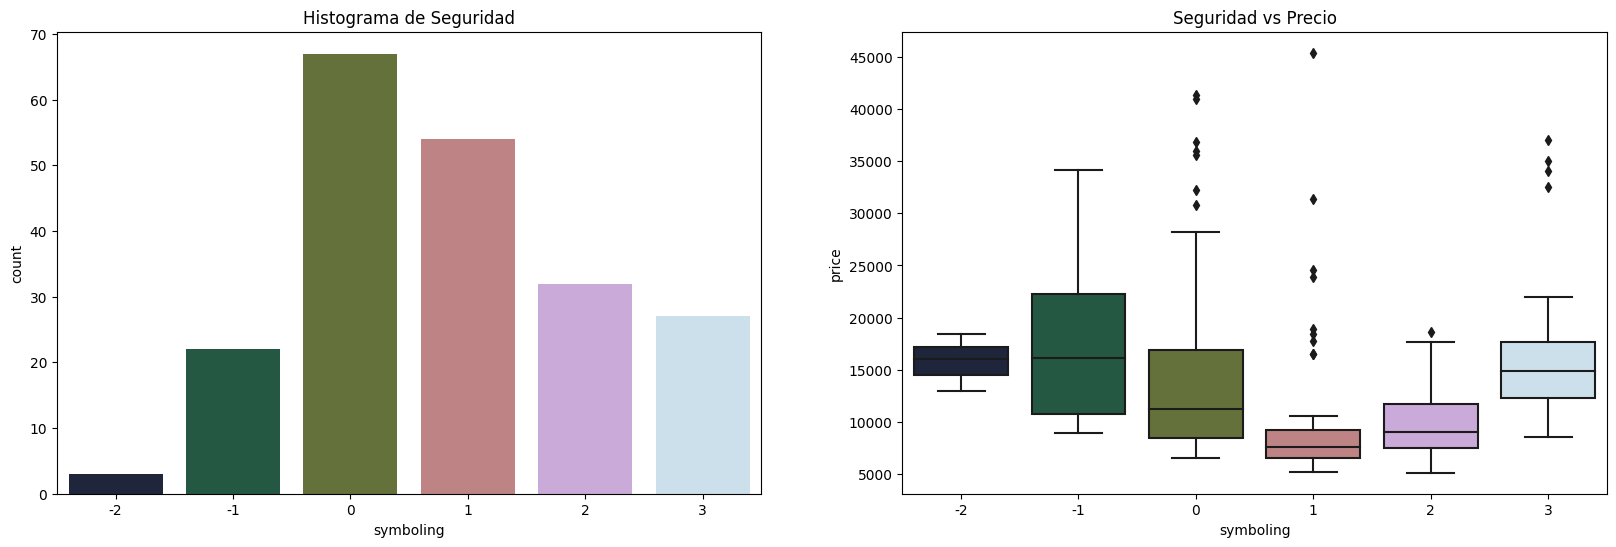

In [20]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
plt.title('Histograma de Seguridad')
sns.countplot(data = cars, x = 'symboling', palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Seguridad vs Precio')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

### Conclusión:
- La mayor seguridad está relacionada con el mayor precio

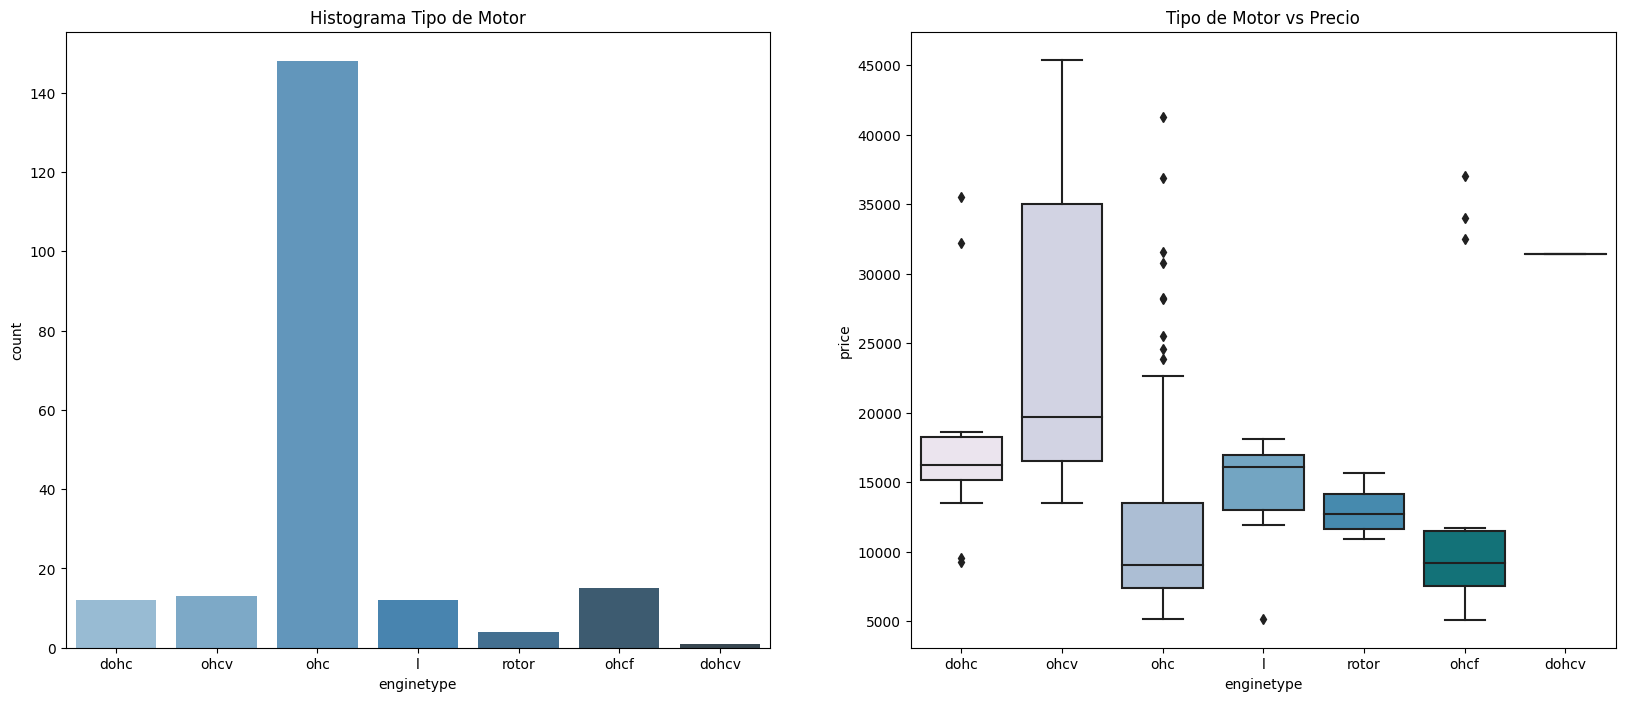

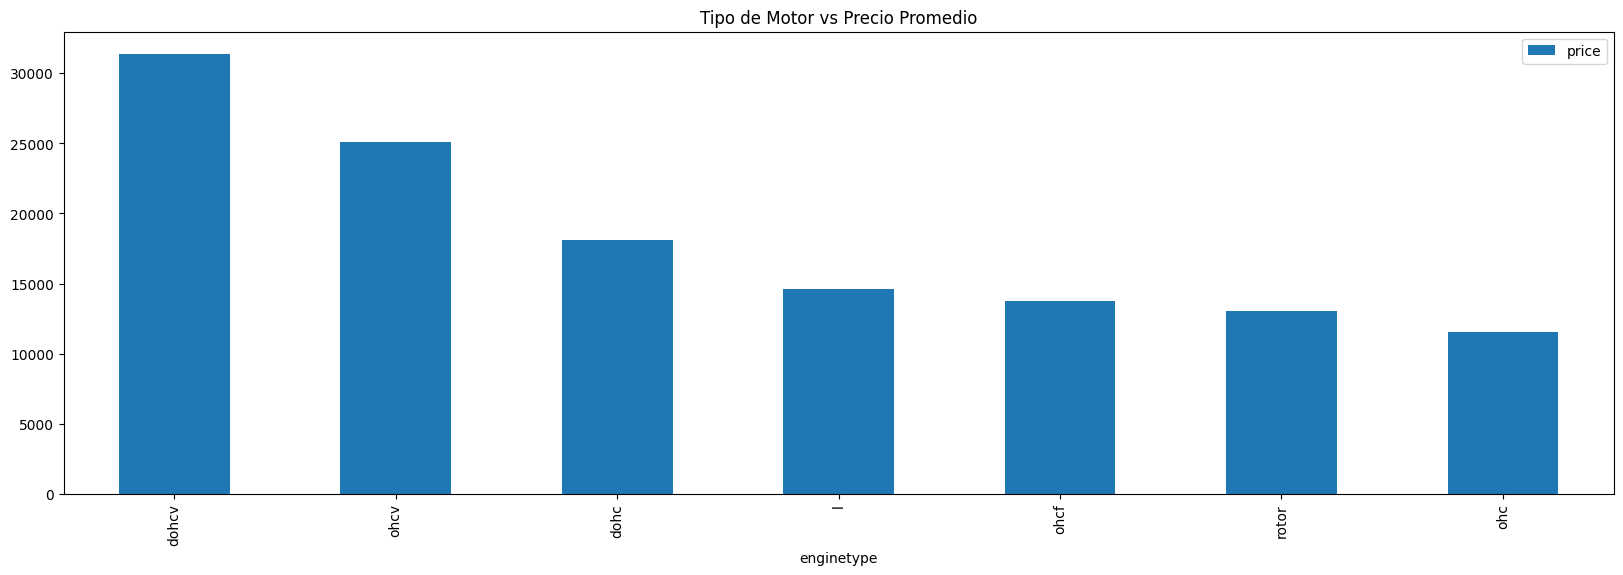

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Histograma Tipo de Motor')
sns.countplot(data = cars, x = 'enginetype', palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Tipo de Motor vs Precio')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(20,6))
plt.title('Tipo de Motor vs Precio Promedio')
plt.show()

## Conclusión

-El tipo de motor OHC es el más elegido.

- Así como el precio más bajo.

<Figure size 2500x600 with 0 Axes>

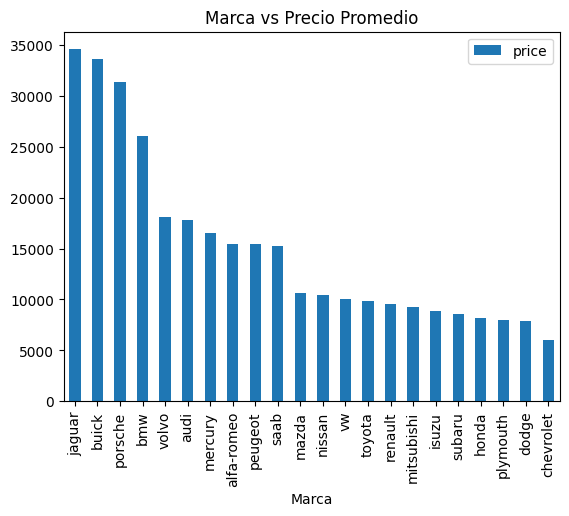

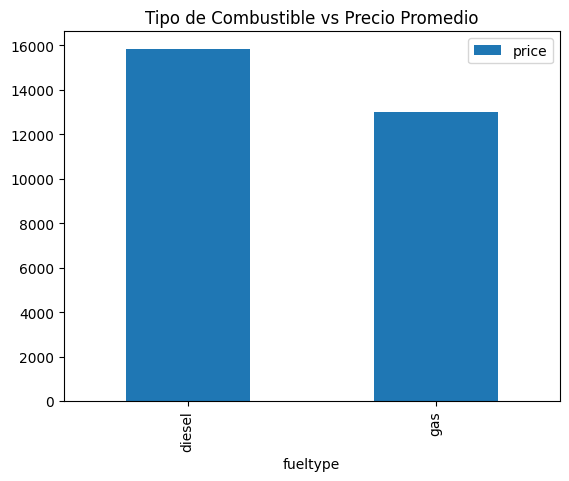

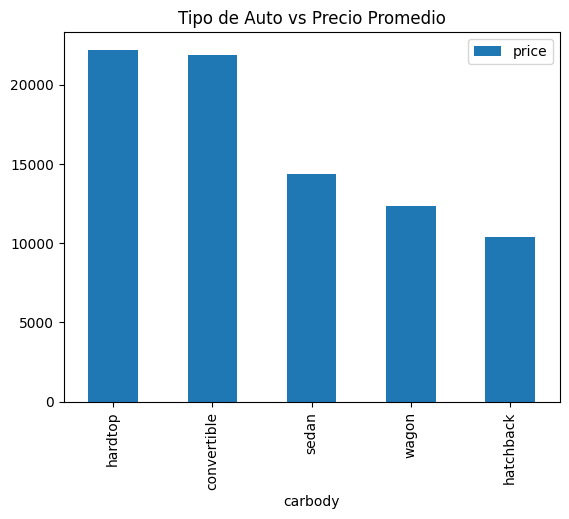

In [22]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['Marca'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Marca vs Precio Promedio')
plt.show();

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Tipo de Combustible vs Precio Promedio')
plt.show();

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Tipo de Auto vs Precio Promedio')
plt.show();

## Conclusión
-Los vehículos de las empresas Jaguar y Buick parecen tener el precio promedio más alto.

-Los vehículos diésel tienen un precio promedio más alto que los vehículos de gasolina.

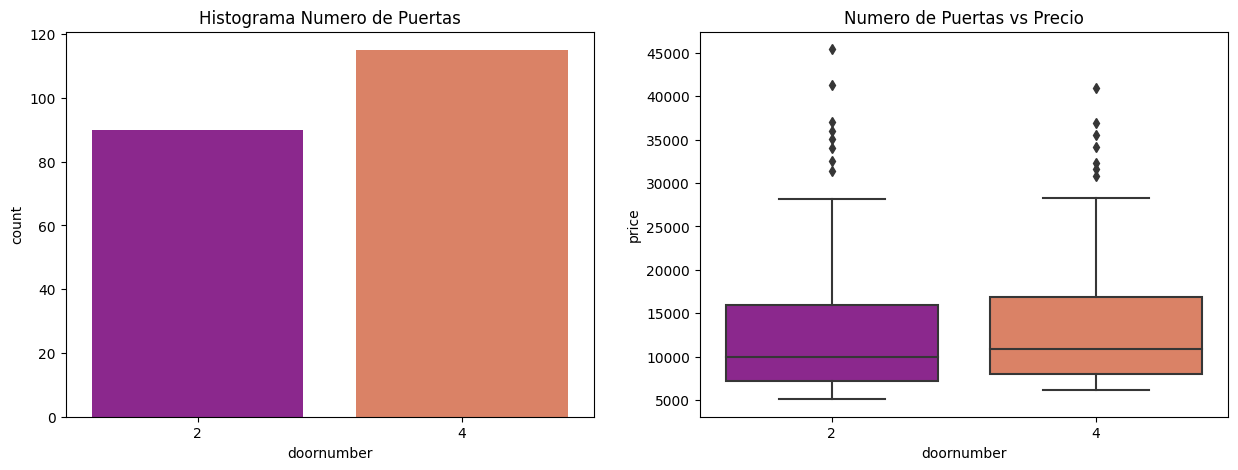

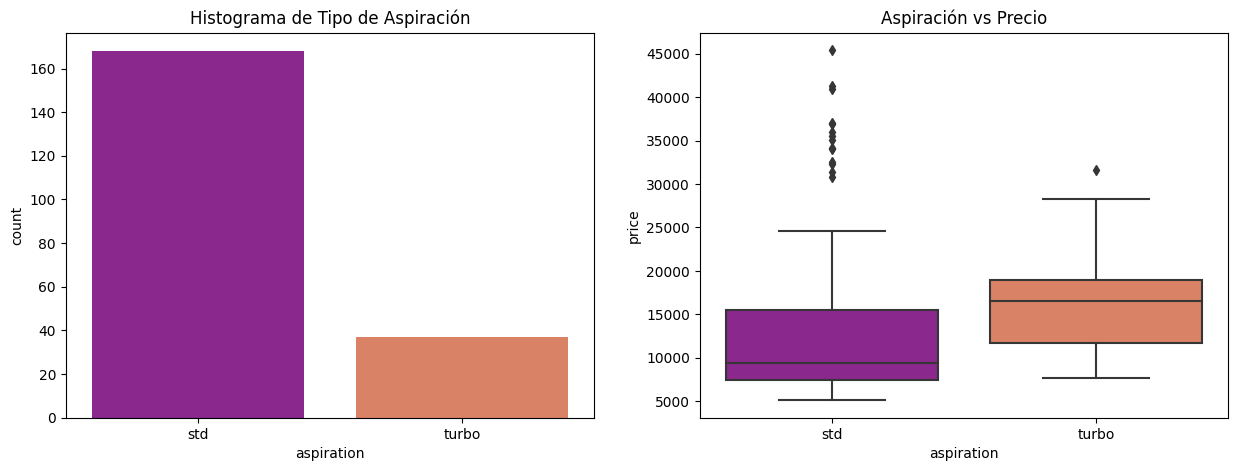

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histograma Numero de Puertas')
sns.countplot(data = cars, x = 'doornumber', palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Numero de Puertas vs Precio')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Histograma de Tipo de Aspiración')
sns.countplot(data = cars, x = 'aspiration', palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiración vs Precio')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

## Conclusión

-La variable Numero de puertas no parece tener un impacto significativo en los precios. 

-Los vehículos con aspiración turbo tienen un precio más alto que los estándar.

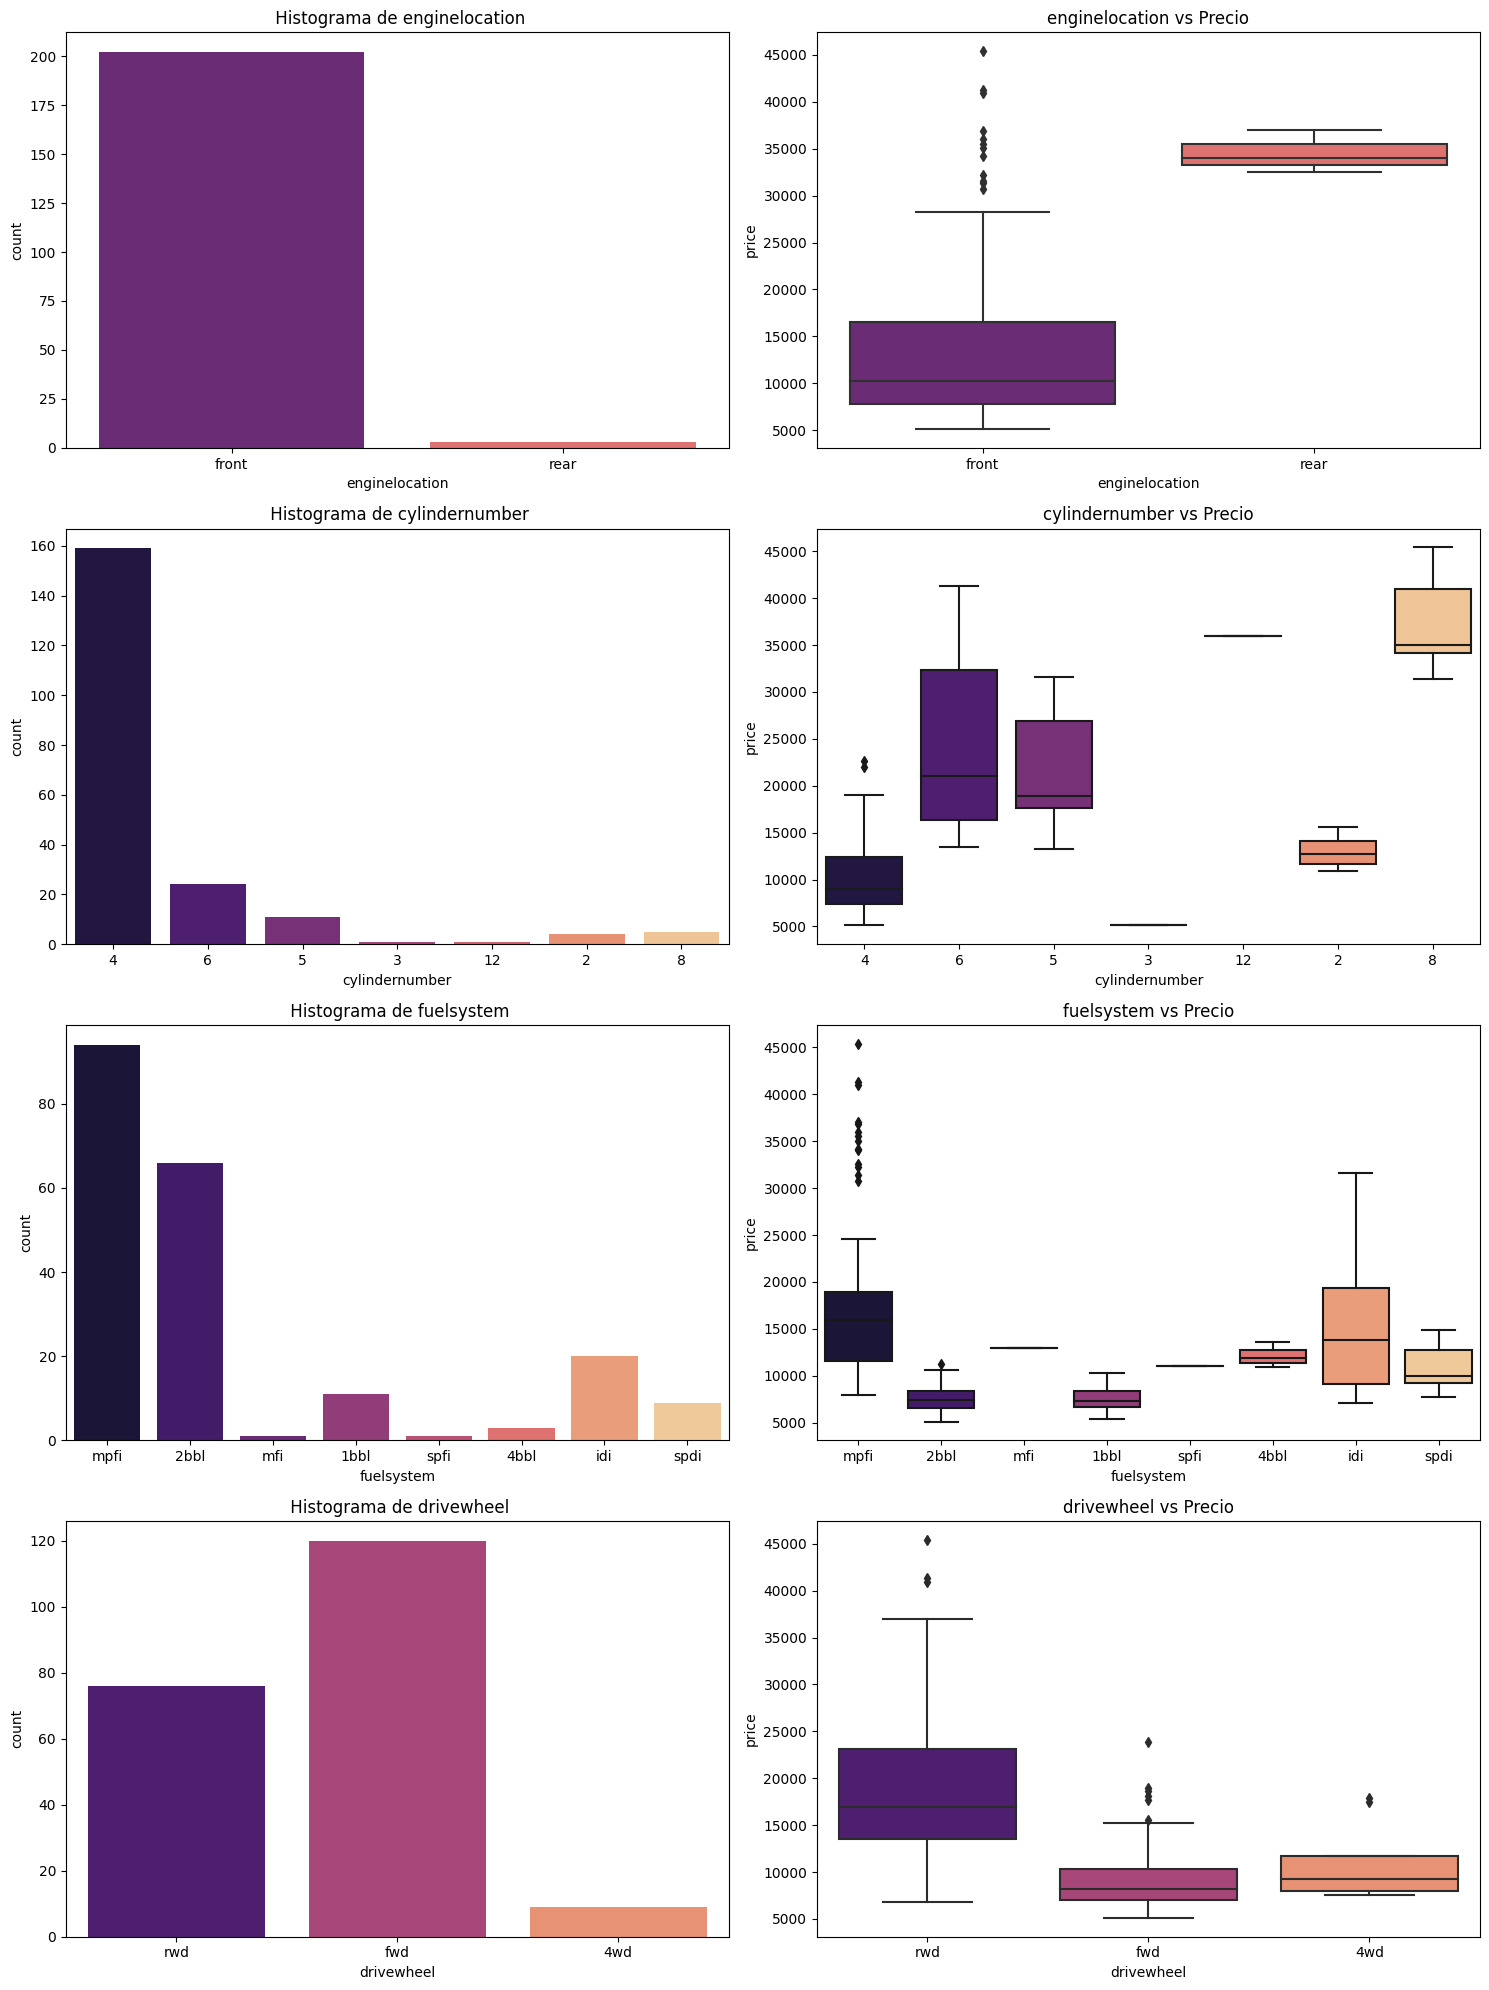

In [24]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(' Histograma de ' +x)
    sns.countplot(data = cars, x=cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Precio')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

## Conclusión

-El número más común de cilindros es cuatro, seguido de seis y cinco. Aunque los motores de ocho cilindros tienen el rango de precios más alto.

-Los sistemas de combustible mpfi y 2bbl son los más comunes. mpfi y idi tienen los precios más altos.

-La mayoría de los vehículos de alto precio prefieren la tracción trasera (rwd).


## Visualizacion de Variables Numericas

- carlength
- carwidth
- carheight
- curbweight
- enginesize
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- wheelbase
- citympg
- highwaympg

#### - Análisis de la correlación de cada variable y target
#### - Análisis de la correlacion entre variables para encontrar colinealidades

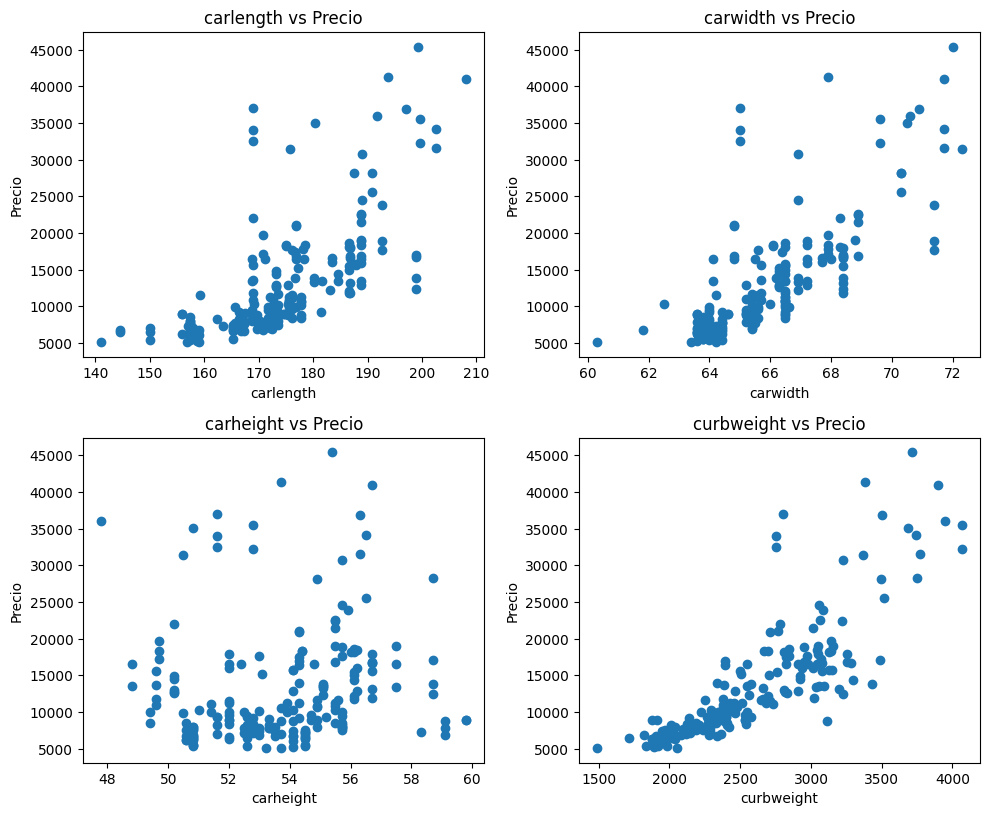

In [25]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Precio')
    plt.ylabel('Precio')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

## Conclusión
 
 -carwidth, carlength y curbweight (Ancho, Largo y Peso del Auto), parecen tener una correlación positiva con el precio.

-carheight (Altura del Auto) no muestra ninguna tendencia significativa con respecto al precio.

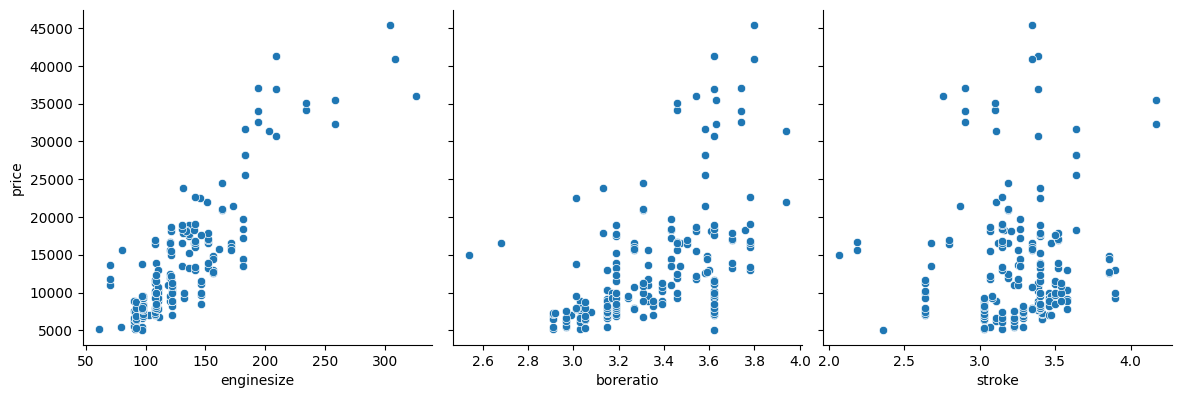

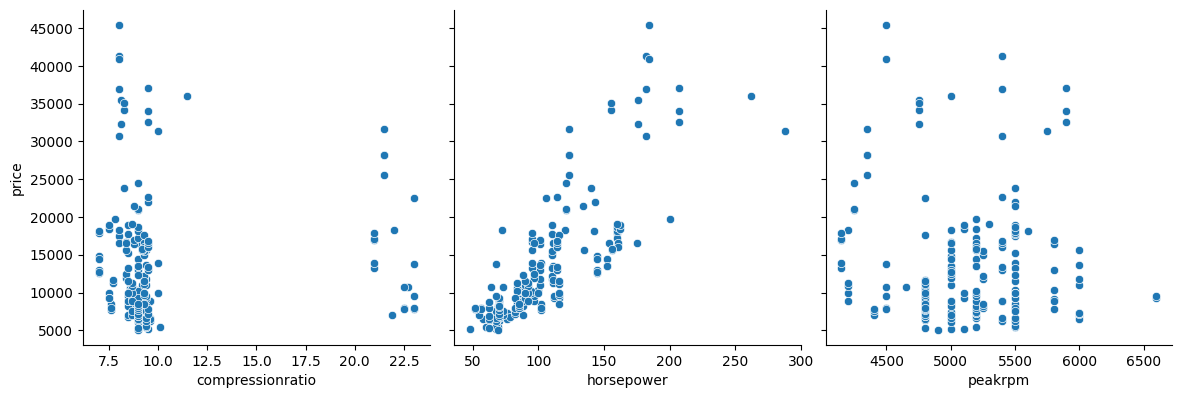

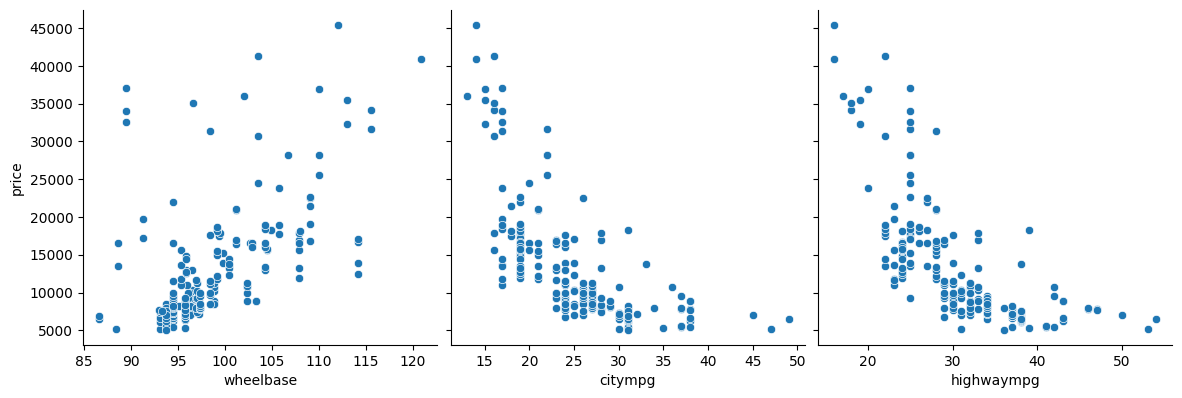

In [26]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

## Conclusión

- enginesize, boreratio, horsepower, wheelbase (Tipo de motor, relación y potencia y espacio entre ejes), parecen tener una correlación positiva significativa con el precio.

- citympg, highwaympg (Consumo de combustible en ciudad y ruta), parecen tener una correlación negativa significativa con el precio.

In [29]:
# creación de una variable numerica que contenga a todas para ver sus correclaciones
variables_numericas = cars[["car_ID",'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]

In [30]:
corr_variables_numericas = variables_numericas.corr()

<Axes: >

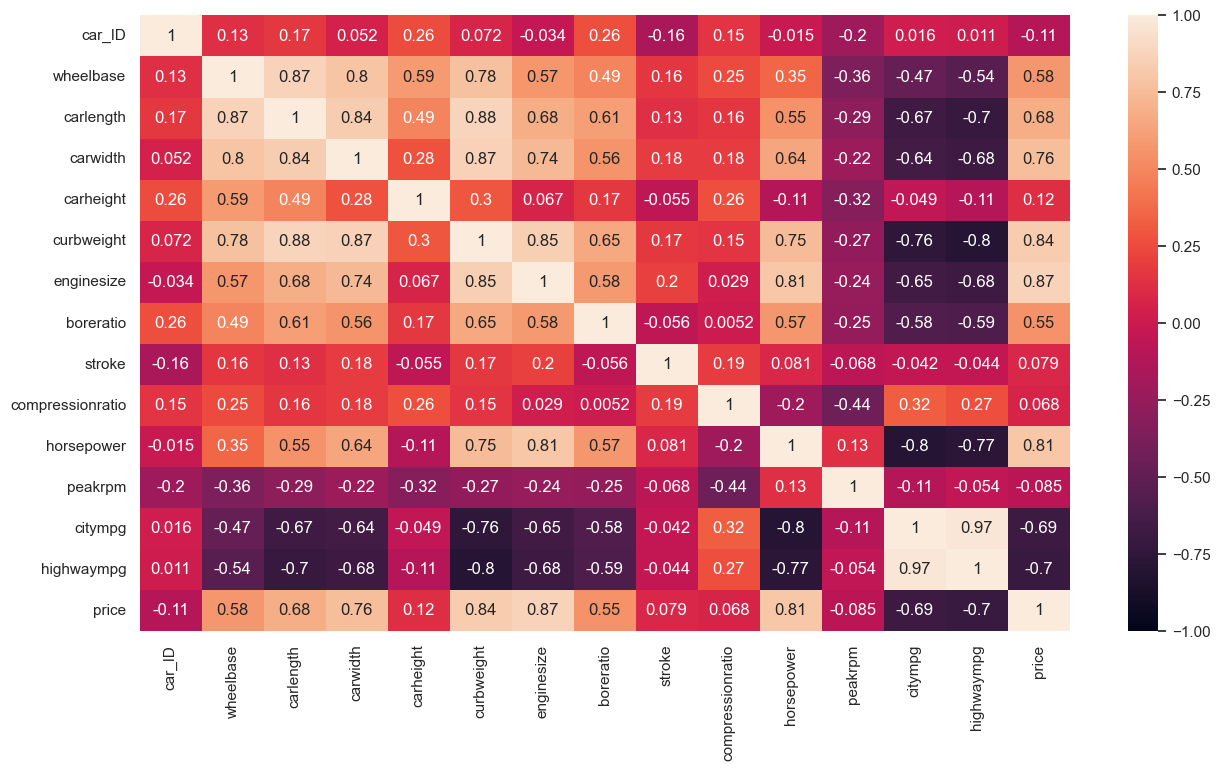

In [31]:
#reflejo la correlación de cada una con un Headmap (Pearson)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_variables_numericas,annot=True, vmax=1,vmin=-1)

## Preparación de Datos para la generación de modelos

### Creación de dummies

In [39]:
variables_categoricas

['Marca',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [40]:
dfCars = pd.get_dummies(cars, columns= variables_categoricas,
                        drop_first= False, dtype=int)

In [41]:
dfCars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4,109.1,188.8,68.9,55.5,2952,4,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,volvo 144ea,4,109.1,188.8,68.8,55.5,3049,4,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,volvo 244dl,4,109.1,188.8,68.9,55.5,3012,6,...,1,0,0,0,0,0,0,1,0,0
203,204,-1,volvo 246,4,109.1,188.8,68.9,55.5,3217,6,...,0,0,0,0,0,1,0,0,0,0


In [42]:
dfCars.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Modelo',
       'Marca_alfa-romeo', 'Marca_audi', 'Marca_bmw', 'Marca_buick',
       'Marca_chevrolet', 'Marca_dodge', 'Marca_honda', 'Marca_isuzu',
       'Marca_jaguar', 'Marca_mazda', 'Marca_mercury', 'Marca_mitsubishi',
       'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth', 'Marca_porsche',
       'Marca_renault', 'Marca_saab', 'Marca_subaru', 'Marca_toyota',
       'Marca_volvo', 'Marca_vw', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
   

## Aprendizaje Supervisado por Modelos de Regresión

## Construcción de los modelos

### Modelo de Regresión lineal

In [46]:
#acá comenzamos a crear las variables features (X) y las variables objetivo (y)

feature_cols=['symboling', 'doornumber', 
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 
       'Marca_alfa-romeo', 'Marca_audi', 'Marca_bmw', 'Marca_buick',
       'Marca_chevrolet', 'Marca_dodge', 'Marca_honda', 'Marca_isuzu',
       'Marca_jaguar', 'Marca_mazda', 'Marca_mercury', 'Marca_mitsubishi',
       'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth', 'Marca_porsche',
       'Marca_renault', 'Marca_saab', 'Marca_subaru', 'Marca_toyota',
       'Marca_volvo', 'Marca_vw', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi']
X= dfCars[feature_cols]
y= dfCars.price

#### Entrenando al modelo

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
linear_model = LinearRegression()
linear_model.fit(X, y)
from sklearn import metrics

y_pred=linear_model.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1263.4663883401504
MSE: 3777743.096913899
RMSE: 1943.6417100159945
R2: 0.9454748217039072


In [48]:
def Visualize_model_reg (y, y_pred):
    plt.figure (figsize=(12, 6))
# Scatter plot    
    plt.subplot (1, 2, 1)
    plt.scatter (y_pred, y)
    plt.xlabel ("Model Predictions")
    plt.ylabel ("True Value")
# Đặt giới hạn trục    
    plt.plot ([0, np.max(y) + 2*np.min(y)], [0, np.max(y) + 2*np.min(y)], '-', color = "r")
#  Displot   
    plt.subplot (1, 2, 2)
    sns.distplot (y, hist = False, color = "r", label = "True Value")
    sns.distplot (y_pred, hist = False, color = "b", label = "Model Predictions", axlabel="Distribution")
    plt.legend()
    plt.show()

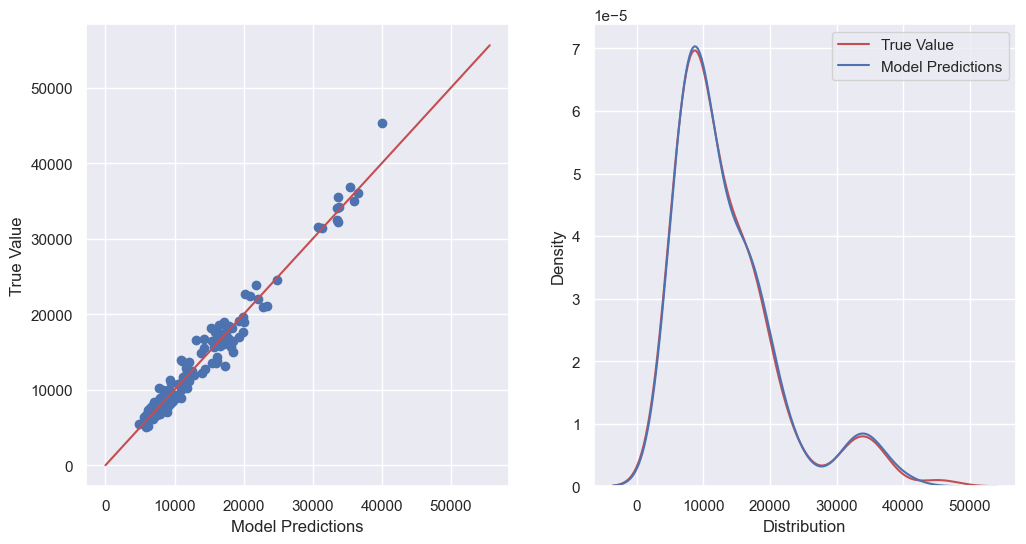

In [50]:
Visualize_model_reg (y_train, linear_model.predict (X_train))

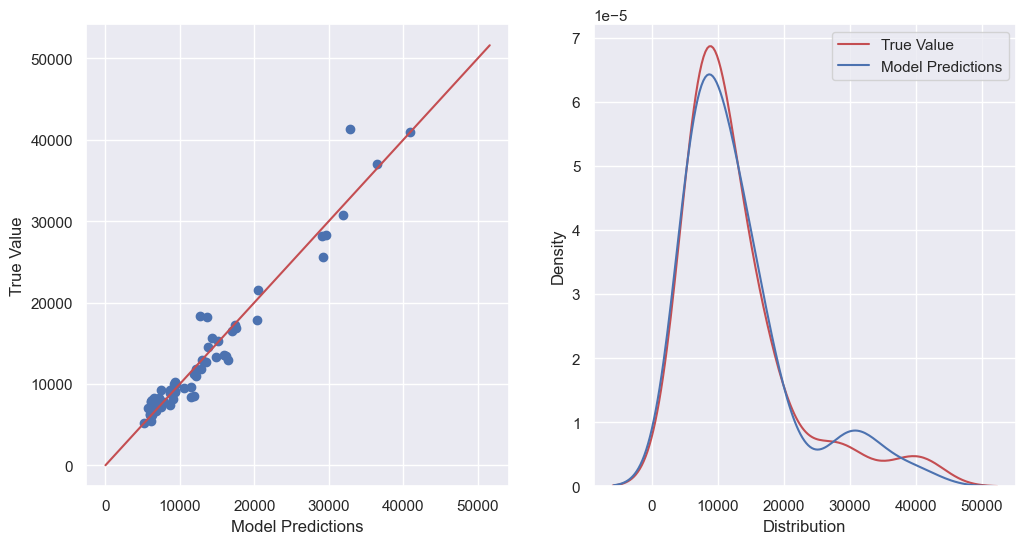

In [51]:
Visualize_model_reg (y_test, linear_model.predict (X_test))

### Modelo de Regresión Lineal con Validación Cruzada

In [53]:

# Creamos la funcion de Validación cruzada
def regresion(feature_cols):

    X = dfCars[feature_cols]
    y = dfCars.price
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
    linreg = LinearRegression()
 
    linreg.fit(X_train, y_train)
 
    score = linreg.score(X_train,y_train)
 
    print("Metrica del modelo sin cross validation", score)
    
    kf = KFold(n_splits=7, shuffle=True, random_state=68)
 
    cv_scores = cross_val_score(linreg, X_train, y_train, cv=kf)
    
    cv_scores = [round(num, 3) for num in cv_scores]
    print('Se obtienen los siguientes coeficientes de determinación con cross validation:')
    print(cv_scores)
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
    print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}', '\n')
 
    y_pred = linreg.predict(X_test)
    print ('Metricas en Test')
    print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('test R2:', metrics.r2_score(y_test, y_pred))

In [54]:
regresion(feature_cols)

Metrica del modelo sin cross validation 0.9717488874560091
Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.81, 0.906, 0.869, 0.883, 0.922, 0.951, 0.935]
Max R-Squared: 0.951
Min R-Squared: 0.81
Promedio R-Squared: 0.897
Desviación Estándar: 0.044
Intervalo de confianza 95%: [0.81885 0.9486 ] 

Metricas en Test
Test MAE: 1981.92770343531
Test MSE: 9542382.701332599
Test RMSE: 3089.0747322349775
test R2: 0.8767394524817941


#### Colinealidades 
- carlength y wheelbase
- curbweight y engine size


In [55]:
#la realizamos sin colinealidades para mejorar el modelo
feature_cols_sin_colinealidades = ['symboling','doornumber', 'wheelbase',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_alfa-romeo', 'Marca_audi',
       'Marca_bmw', 'Marca_buick', 'Marca_chevrolet', 'Marca_dodge',
       'Marca_honda', 'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda',
       'Marca_mercury', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_plymouth', 'Marca_porsche', 'Marca_renault', 'Marca_saab',
       'Marca_subaru', 'Marca_toyota', 'Marca_volvo', 'Marca_vw']

In [56]:
regresion(feature_cols_sin_colinealidades)

Metrica del modelo sin cross validation 0.9729382264568909
Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.842, 0.892, 0.874, 0.892, 0.931, 0.966, 0.938]
Max R-Squared: 0.966
Min R-Squared: 0.842
Promedio R-Squared: 0.905
Desviación Estándar: 0.039
Intervalo de confianza 95%: [0.8468 0.9618] 

Metricas en Test
Test MAE: 1963.097024405143
Test MSE: 9694351.714457419
Test RMSE: 3113.575390842081
test R2: 0.8747764434147871


## Conclusiones 
- La regresión lineal resulto con r2 de 0,94 
- El modelo de regresión lineal con validacion cruzada el r2 resluto de 0,87

## Aprendizaje Supervisado por Modelos de Clasificación

### Modelo de Clasificación

#### Se nos pide diferenciarlos en autos de ata y baja gama separandalos a traves de la mediana

In [57]:
#buscamos la mediana de la variable precio

medianaPrice=dfCars['price'].median()
medianaPrice

10295.0

In [58]:
#separamos el dataset por alta y baja gama
condicion = lambda x: '1' if x > medianaPrice else '0'
dfCars['gama'] = dfCars.apply(lambda x: '1' if x['price']>medianaPrice else '0',axis=1)

In [60]:
dfCars['gama']= dfCars['gama'].astype(float)

In [61]:
X = dfCars[feature_cols]
y = dfCars.gama

In [62]:
#importamos librerias para trabajar 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

### Vamos a utilizar 3 modelos 
 - Regresión logística
 - Árbol de decisión
 - K-Nearest Neighbors (KNN) Vecinos Cercanos

##### Entrenamos el modelo


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#### Luego de escalar los datos, se realizan 2 listas una con los estimadores de los modelos y otra con la Grid y los parametros para estimar en cada modelo. Se realizara así una iteración sobre estas listas para lograr la estimación de los hiperparametros de cada modelo.

In [65]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]

In [66]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]},
    { "criterion" : ["gini", "entropy"],
      "min_samples_leaf": [5,10,15,20,None], 
      "max_depth" : [1,3,4,5,8,9,10,11,12,13,14,None],
      "min_samples_split": [2, 3, 4,None]}
]

In [67]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [68]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14,
                                       None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min

#### Resultados de GridSearch
- Mejor modelo Regresion logistica

In [69]:
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9441176470588235
LogisticRegression(C=1, penalty='l1', solver='saga')
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.9253676470588236
KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.9323529411764706
DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=5)
{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
pd.DataFrame(grids[0].cv_results_)

In [ ]:
pd.DataFrame(grids[1].cv_results_)

In [ ]:
pd.DataFrame(grids[2].cv_results_)

### Evaluacion de performance

In [70]:
X_test = scaler.transform(X_test)

In [71]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)
y_preds_tree = grids[2].predict(X_test)

#### Resultados de Modelo de Regresion Logística

In [72]:
print (classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        18
         1.0       0.94      0.74      0.83        23

    accuracy                           0.83        41
   macro avg       0.84      0.84      0.83        41
weighted avg       0.85      0.83      0.83        41



In [73]:
confusion_matrix(y_test, y_preds_log)

array([[17,  1],
       [ 6, 17]], dtype=int64)

#### Resultados de Modelo de Regresion KNN Vecinos Cercanos

In [74]:
print (classification_report(y_test, y_preds_knn))

              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79        18
         1.0       0.94      0.65      0.77        23

    accuracy                           0.78        41
   macro avg       0.81      0.80      0.78        41
weighted avg       0.82      0.78      0.78        41



In [75]:
confusion_matrix(y_test, y_preds_knn)

array([[17,  1],
       [ 8, 15]], dtype=int64)

#### Resultados de Modelo de Arbol de Decisión

In [76]:
print (classification_report(y_test, y_preds_tree))

              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.95      0.78      0.86        23

    accuracy                           0.85        41
   macro avg       0.86      0.86      0.85        41
weighted avg       0.87      0.85      0.85        41



In [77]:
confusion_matrix(y_test, y_preds_tree)

array([[17,  1],
       [ 5, 18]], dtype=int64)

### Analizamos curva ROC y Auc para cada modelo

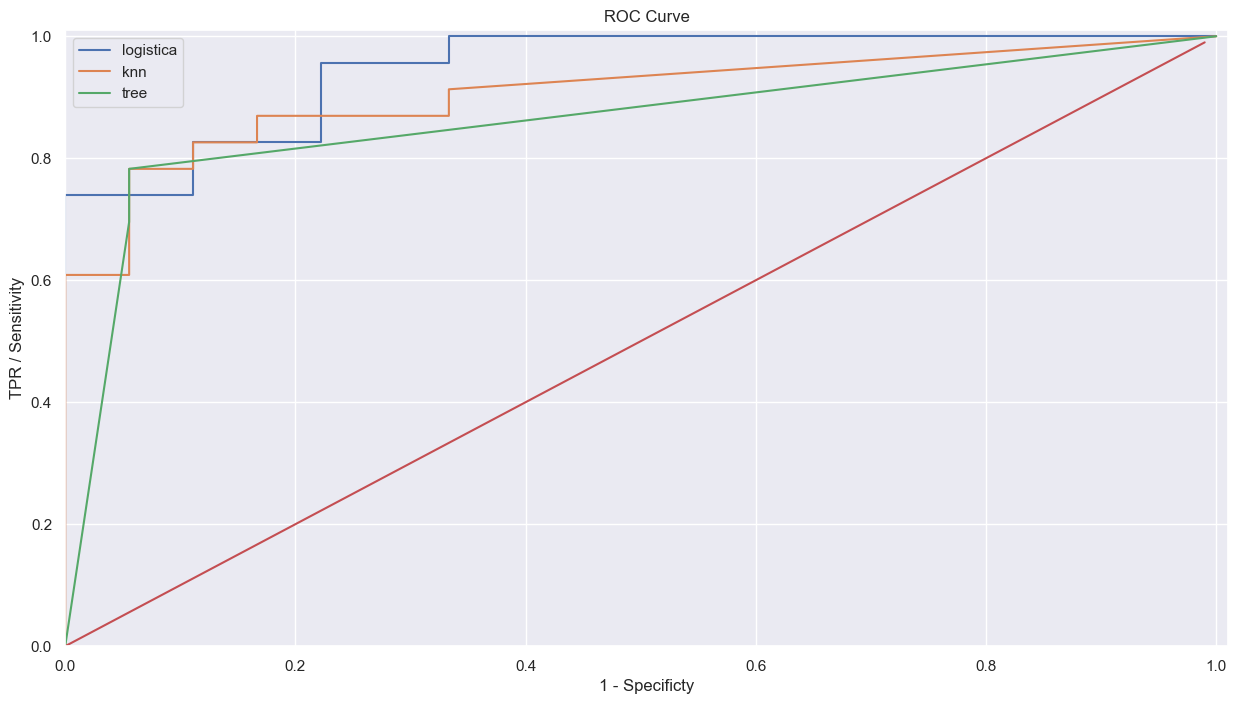

In [78]:
# ROC Curve y AUC
y_pred_proba_log = grids[0].predict_proba(X_test)
y_pred_proba_knn = grids[1].predict_proba(X_test)
y_pred_proba_tree = grids[2].predict_proba(X_test)



from sklearn.metrics import roc_curve
fpr_l,tpr_l,thr_l = roc_curve(y_test, y_pred_proba_log[:,1])
fpr_k,tpr_k,thr_k = roc_curve(y_test, y_pred_proba_knn[:,1])
fpr_t,tpr_t,thr_t = roc_curve(y_test, y_pred_proba_tree[:,1])


df_l = pd.DataFrame(dict(fpr=fpr_l, tpr=tpr_l, thr = thr_l))
df_k = pd.DataFrame(dict(fpr=fpr_k, tpr=tpr_k, thr = thr_k))
df_t = pd.DataFrame(dict(fpr=fpr_t, tpr=tpr_t, thr = thr_t))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df_l['fpr'],df_l['tpr'])
plt.plot(df_k['fpr'],df_k['tpr'])
plt.plot(df_t['fpr'],df_t['tpr'])
plt.legend(['logistica','knn','tree'])

plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [79]:
from sklearn.metrics import auc
print('AUC log=', auc(fpr_l, tpr_l))
print('AUC knn=', auc(fpr_k, tpr_k))
print('AUC tree=', auc(fpr_t, tpr_t))

AUC log= 0.9468599033816425
AUC knn= 0.9057971014492754
AUC tree= 0.861111111111111


## Conclusión
- El caso del análisis supervisado de clasificación por precios de gamma alta o baja nos arrojo una accuracy alta de acuerdo a los modelos aquí presentados.
- Luego presentar las métricas en la curva ROC y los parametros AUC para cada tipo de modelo, se puede afirmar el modelo de Regresión Logaritmica es el de mayor performance.